In [18]:
#importing all necessary libraries and packages
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [19]:
#loading in data and filtering to receive dataset of players who appropriately fit the use case
df = pd.read_csv('RatioRecommender.csv')
df['votes'] = df['likes'] + df['dislikes']
df = df[df['votes']>20]
df = df[df['dislikes']>0]
df = df[df['overall']>=80]
df['Ratio'] = df['likes']/df['dislikes']

In [20]:
#viewing output table
df.drop(columns = ['Unnamed: 0']).reset_index().drop(columns = ['index'])

,player_face_url,sofifa_id,short_name,long_name,overall,player_positions,league_name,club_name,nationality_name,likes,dislikes,votes,Ratio
0,https://cdn.sofifa.net/players/158/023/22_120.png,158023,L. Messi,Lionel Andrés Messi Cuccittini,93,"RW, ST, CF",French Ligue 1,Paris Saint-Germain,Argentina,1927,645,2572,2.987597
1,https://cdn.sofifa.net/players/188/545/22_120.png,188545,R. Lewandowski,Robert Lewandowski,92,ST,German 1. Bundesliga,FC Bayern München,Poland,520,104,624,5.000000
2,https://cdn.sofifa.net/players/020/801/22_120.png,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,91,"ST, LW",English Premier League,Manchester United,Portugal,1700,517,2217,3.288201
3,https://cdn.sofifa.net/players/190/871/22_120.png,190871,Neymar Jr,Neymar da Silva Santos Júnior,91,"LW, CAM",French Ligue 1,Paris Saint-Germain,Brazil,860,288,1148,2.986111
4,https://cdn.sofifa.net/players/192/985/22_120.png,192985,K. De Bruyne,Kevin De Bruyne,91,"CM, CAM",English Premier League,Manchester City,Belgium,530,60,590,8.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,https://cdn.sofifa.net/players/241/095/22_120.png,241095,N. Vlašić,Nikola Vlašić,80,CAM,English Premier League,West Ham United,Croatia,165,16,181,10.312500
488,https://cdn.sofifa.net/players/243/576/22_120.png,243576,Pedro Porro,Pedro Antonio Porro Sauceda,80,"RWB, RM",Portuguese Liga ZON SAGRES,Sporting CP,Spain,135,16,151,8.437500
489,https://cdn.sofifa.net/players/244/369/22_120.png,244369,V. Tsygankov,Viktor Tsygankov,80,RM,Ukrainian Premier League,Dynamo Kyiv,Ukraine,191,14,205,13.642857
490,https://cdn.sofifa.net/players/244/470/22_120.png,244470,V. Coufal,Vladimír Coufal,80,"RB, RWB",English Premier League,West Ham United,Czech Republic,23,1,24,23.000000


In [21]:
#viewing descriptive statistics of output table
df.drop(columns = ['Unnamed: 0']).describe()

,sofifa_id,overall,likes,dislikes,votes,Ratio
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,205383.558943,82.617886,195.201220,31.865854,227.067073,7.775227
std,27721.613631,2.601959,213.372365,50.432168,255.909801,4.045727
min,1179.000000,80.000000,16.000000,1.000000,21.000000,0.493548
25%,192958.750000,81.000000,64.750000,9.750000,77.000000,4.983824
50%,207862.500000,82.000000,132.500000,19.500000,157.500000,7.033482
75%,225088.750000,84.000000,247.000000,34.250000,283.250000,9.658046
max,251854.000000,93.000000,1927.000000,645.000000,2572.000000,30.000000


In [22]:
#extracting 95% confidence interval of the 25th percentile of the like to dislike ratio for all players
metasub = df[df['Ratio']>5.0]
metasub = metasub.reset_index().drop(columns = ['index'])
st.t.interval(0.95, len(metasub['Ratio'])-1, loc=np.mean(metasub['Ratio']), scale=st.sem(metasub['Ratio']))

(8.843279365006124, 9.616798855509549)

In [23]:
#viewing first meta filter output table
metasub

,Unnamed: 0,player_face_url,sofifa_id,short_name,long_name,overall,player_positions,league_name,club_name,nationality_name,likes,dislikes,votes,Ratio
0,4,https://cdn.sofifa.net/players/192/985/22_120.png,192985,K. De Bruyne,Kevin De Bruyne,91,"CM, CAM",English Premier League,Manchester City,Belgium,530,60,590,8.833333
1,5,https://cdn.sofifa.net/players/200/389/22_120.png,200389,J. Oblak,Jan Oblak,91,GK,Spain Primera Division,Atlético de Madrid,Slovenia,258,17,275,15.176471
2,7,https://cdn.sofifa.net/players/167/495/22_120.png,167495,M. Neuer,Manuel Peter Neuer,90,GK,German 1. Bundesliga,FC Bayern München,Germany,256,41,297,6.243902
3,10,https://cdn.sofifa.net/players/215/914/22_120.png,215914,N. Kanté,N'Golo Kanté,90,"CDM, CM",English Premier League,Chelsea,France,416,30,446,13.866667
4,12,https://cdn.sofifa.net/players/192/119/22_120.png,192119,T. Courtois,Thibaut Courtois,89,GK,Spain Primera Division,Real Madrid CF,Belgium,224,44,268,5.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,504,https://cdn.sofifa.net/players/241/095/22_120.png,241095,N. Vlašić,Nikola Vlašić,80,CAM,English Premier League,West Ham United,Croatia,165,16,181,10.312500
357,505,https://cdn.sofifa.net/players/243/576/22_120.png,243576,Pedro Porro,Pedro Antonio Porro Sauceda,80,"RWB, RM",Portuguese Liga ZON SAGRES,Sporting CP,Spain,135,16,151,8.437500
358,506,https://cdn.sofifa.net/players/244/369/22_120.png,244369,V. Tsygankov,Viktor Tsygankov,80,RM,Ukrainian Premier League,Dynamo Kyiv,Ukraine,191,14,205,13.642857
359,507,https://cdn.sofifa.net/players/244/470/22_120.png,244470,V. Coufal,Vladimír Coufal,80,"RB, RWB",English Premier League,West Ham United,Czech Republic,23,1,24,23.000000


In [24]:
#keeping features needed to create tags and for the novel and traditional systems
df_new = df[['player_face_url', 'overall', 'player_positions', 'short_name', 'league_name', 'club_name', 'nationality_name', 'Ratio']]
df_new = df_new.reset_index().drop(columns = ['index'])

In [25]:
#viewing top 15 rows
df_new.head(15)

,player_face_url,overall,player_positions,short_name,league_name,club_name,nationality_name,Ratio
0,https://cdn.sofifa.net/players/158/023/22_120.png,93,"RW, ST, CF",L. Messi,French Ligue 1,Paris Saint-Germain,Argentina,2.987597
1,https://cdn.sofifa.net/players/188/545/22_120.png,92,ST,R. Lewandowski,German 1. Bundesliga,FC Bayern München,Poland,5.000000
2,https://cdn.sofifa.net/players/020/801/22_120.png,91,"ST, LW",Cristiano Ronaldo,English Premier League,Manchester United,Portugal,3.288201
3,https://cdn.sofifa.net/players/190/871/22_120.png,91,"LW, CAM",Neymar Jr,French Ligue 1,Paris Saint-Germain,Brazil,2.986111
4,https://cdn.sofifa.net/players/192/985/22_120.png,91,"CM, CAM",K. De Bruyne,English Premier League,Manchester City,Belgium,8.833333
5,https://cdn.sofifa.net/players/200/389/22_120.png,91,GK,J. Oblak,Spain Primera Division,Atlético de Madrid,Slovenia,15.176471
6,https://cdn.sofifa.net/players/231/747/22_120.png,91,"ST, LW",K. Mbappé,French Ligue 1,Paris Saint-Germain,France,4.407821
7,https://cdn.sofifa.net/players/167/495/22_120.png,90,GK,M. Neuer,German 1. Bundesliga,FC Bayern München,Germany,6.243902
8,https://cdn.sofifa.net/players/192/448/22_120.png,90,GK,M. ter Stegen,Spain Primera Division,FC Barcelona,Germany,4.604167
9,https://cdn.sofifa.net/players/202/126/22_120.png,90,ST,H. Kane,English Premier League,Tottenham Hotspur,England,4.863636


In [26]:
#changing datatypes of certain features for future feature engineering
df_new = df_new.astype({'league_name':'str', 'club_name':'str', 'nationality_name':'str'})

In [27]:
#feature engineering required to create tags
df_new['league_name'] = df_new['league_name'].apply(lambda x:x.split()).apply(lambda x: [i.replace(".", "") for i in x])
df_new['club_name'] = df_new['club_name'].apply(lambda x:x.split()).apply(lambda x: [i.replace(".", "") for i in x])
df_new['nationality_name'] = df_new['nationality_name'].apply(lambda x:x.split()).apply(lambda x: [i.replace(".", "") for i in x])

In [28]:
df_new.head()

,player_face_url,overall,player_positions,short_name,league_name,club_name,nationality_name,Ratio
0,https://cdn.sofifa.net/players/158/023/22_120.png,93,"RW, ST, CF",L. Messi,"[French, Ligue, 1]","[Paris, Saint-Germain]",[Argentina],2.987597
1,https://cdn.sofifa.net/players/188/545/22_120.png,92,ST,R. Lewandowski,"[German, 1, Bundesliga]","[FC, Bayern, München]",[Poland],5.000000
2,https://cdn.sofifa.net/players/020/801/22_120.png,91,"ST, LW",Cristiano Ronaldo,"[English, Premier, League]","[Manchester, United]",[Portugal],3.288201
3,https://cdn.sofifa.net/players/190/871/22_120.png,91,"LW, CAM",Neymar Jr,"[French, Ligue, 1]","[Paris, Saint-Germain]",[Brazil],2.986111
4,https://cdn.sofifa.net/players/192/985/22_120.png,91,"CM, CAM",K. De Bruyne,"[English, Premier, League]","[Manchester, City]",[Belgium],8.833333


In [29]:
#Further feature engineering required after viewing output table
df_new['league_name'] = df_new['league_name'].apply(lambda x:[i.replace(" ", "") for i in x])
df_new['club_name'] = df_new['club_name'].apply(lambda x:[i.replace(" ", "") for i in x])
df_new['nationality_name'] = df_new['nationality_name'].apply(lambda x:[i.replace(" ", "") for i in x])

In [30]:
#creating tags feature
df_new['tags'] = df_new['league_name'] + df_new['club_name'] + df_new['nationality_name']

In [31]:
#viewing tags for top 5 rows
df_new.head()

,player_face_url,overall,player_positions,short_name,league_name,club_name,nationality_name,Ratio,tags
0,https://cdn.sofifa.net/players/158/023/22_120.png,93,"RW, ST, CF",L. Messi,"[French, Ligue, 1]","[Paris, Saint-Germain]",[Argentina],2.987597,"[French, Ligue, 1, Paris, Saint-Germain, Argen..."
1,https://cdn.sofifa.net/players/188/545/22_120.png,92,ST,R. Lewandowski,"[German, 1, Bundesliga]","[FC, Bayern, München]",[Poland],5.000000,"[German, 1, Bundesliga, FC, Bayern, München, P..."
2,https://cdn.sofifa.net/players/020/801/22_120.png,91,"ST, LW",Cristiano Ronaldo,"[English, Premier, League]","[Manchester, United]",[Portugal],3.288201,"[English, Premier, League, Manchester, United,..."
3,https://cdn.sofifa.net/players/190/871/22_120.png,91,"LW, CAM",Neymar Jr,"[French, Ligue, 1]","[Paris, Saint-Germain]",[Brazil],2.986111,"[French, Ligue, 1, Paris, Saint-Germain, Brazil]"
4,https://cdn.sofifa.net/players/192/985/22_120.png,91,"CM, CAM",K. De Bruyne,"[English, Premier, League]","[Manchester, City]",[Belgium],8.833333,"[English, Premier, League, Manchester, City, B..."


In [32]:
#dropping features used to create tags as they are not needed anymore
df_final = df_new.drop(columns = ['league_name', 'club_name', 'nationality_name'])

In [33]:
#removing array format of tags for vectorization purposes
df_final['tags'] = df_final['tags'].apply(lambda x: " ".join(x))
df_final.head()

,player_face_url,overall,player_positions,short_name,Ratio,tags
0,https://cdn.sofifa.net/players/158/023/22_120.png,93,"RW, ST, CF",L. Messi,2.987597,French Ligue 1 Paris Saint-Germain Argentina
1,https://cdn.sofifa.net/players/188/545/22_120.png,92,ST,R. Lewandowski,5.000000,German 1 Bundesliga FC Bayern München Poland
2,https://cdn.sofifa.net/players/020/801/22_120.png,91,"ST, LW",Cristiano Ronaldo,3.288201,English Premier League Manchester United Portugal
3,https://cdn.sofifa.net/players/190/871/22_120.png,91,"LW, CAM",Neymar Jr,2.986111,French Ligue 1 Paris Saint-Germain Brazil
4,https://cdn.sofifa.net/players/192/985/22_120.png,91,"CM, CAM",K. De Bruyne,8.833333,English Premier League Manchester City Belgium


In [34]:
#switching case of tags to lower case so it's easier for vectorizer to distinguish between unique words
df_final['tags'] = df_final['tags'].apply(lambda x: x.lower())
df_final.head()

,player_face_url,overall,player_positions,short_name,Ratio,tags
0,https://cdn.sofifa.net/players/158/023/22_120.png,93,"RW, ST, CF",L. Messi,2.987597,french ligue 1 paris saint-germain argentina
1,https://cdn.sofifa.net/players/188/545/22_120.png,92,ST,R. Lewandowski,5.000000,german 1 bundesliga fc bayern münchen poland
2,https://cdn.sofifa.net/players/020/801/22_120.png,91,"ST, LW",Cristiano Ronaldo,3.288201,english premier league manchester united portugal
3,https://cdn.sofifa.net/players/190/871/22_120.png,91,"LW, CAM",Neymar Jr,2.986111,french ligue 1 paris saint-germain brazil
4,https://cdn.sofifa.net/players/192/985/22_120.png,91,"CM, CAM",K. De Bruyne,8.833333,english premier league manchester city belgium


In [35]:
#Splitting player positions into array format for system so it can check for all alternate positions
df_final = df_final.reset_index().drop(columns = ['index'])
df_final['player_positions'] = df_final['player_positions'].apply(lambda x: x.split(','))
df_final.head()

,player_face_url,overall,player_positions,short_name,Ratio,tags
0,https://cdn.sofifa.net/players/158/023/22_120.png,93,"[RW, ST, CF]",L. Messi,2.987597,french ligue 1 paris saint-germain argentina
1,https://cdn.sofifa.net/players/188/545/22_120.png,92,[ST],R. Lewandowski,5.000000,german 1 bundesliga fc bayern münchen poland
2,https://cdn.sofifa.net/players/020/801/22_120.png,91,"[ST, LW]",Cristiano Ronaldo,3.288201,english premier league manchester united portugal
3,https://cdn.sofifa.net/players/190/871/22_120.png,91,"[LW, CAM]",Neymar Jr,2.986111,french ligue 1 paris saint-germain brazil
4,https://cdn.sofifa.net/players/192/985/22_120.png,91,"[CM, CAM]",K. De Bruyne,8.833333,english premier league manchester city belgium


In [36]:
#observing resultant table
df_final

,player_face_url,overall,player_positions,short_name,Ratio,tags
0,https://cdn.sofifa.net/players/158/023/22_120.png,93,"[RW, ST, CF]",L. Messi,2.987597,french ligue 1 paris saint-germain argentina
1,https://cdn.sofifa.net/players/188/545/22_120.png,92,[ST],R. Lewandowski,5.000000,german 1 bundesliga fc bayern münchen poland
2,https://cdn.sofifa.net/players/020/801/22_120.png,91,"[ST, LW]",Cristiano Ronaldo,3.288201,english premier league manchester united portugal
3,https://cdn.sofifa.net/players/190/871/22_120.png,91,"[LW, CAM]",Neymar Jr,2.986111,french ligue 1 paris saint-germain brazil
4,https://cdn.sofifa.net/players/192/985/22_120.png,91,"[CM, CAM]",K. De Bruyne,8.833333,english premier league manchester city belgium
...,...,...,...,...,...,...
487,https://cdn.sofifa.net/players/241/095/22_120.png,80,[CAM],N. Vlašić,10.312500,english premier league west ham united croatia
488,https://cdn.sofifa.net/players/243/576/22_120.png,80,"[RWB, RM]",Pedro Porro,8.437500,portuguese liga zon sagres sporting cp spain
489,https://cdn.sofifa.net/players/244/369/22_120.png,80,[RM],V. Tsygankov,13.642857,ukrainian premier league dynamo kyiv ukraine
490,https://cdn.sofifa.net/players/244/470/22_120.png,80,"[RB, RWB]",V. Coufal,23.000000,english premier league west ham united czech r...


In [37]:
#observing descrtpitive statistics for ratio for all players
df_final.describe().drop(columns = ['overall'])

,Ratio
count,492.000000
mean,7.775227
std,4.045727
min,0.493548
25%,4.983824
50%,7.033482
75%,9.658046
max,30.000000


In [39]:
#creating a vector of tags per player
cv = CountVectorizer(max_features = 2000, stop_words = 'english')
vectors = cv.fit_transform(df_final['tags']).toarray()

In [40]:
#observing lionel messis vector
vectors[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

/Users/sidgog/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


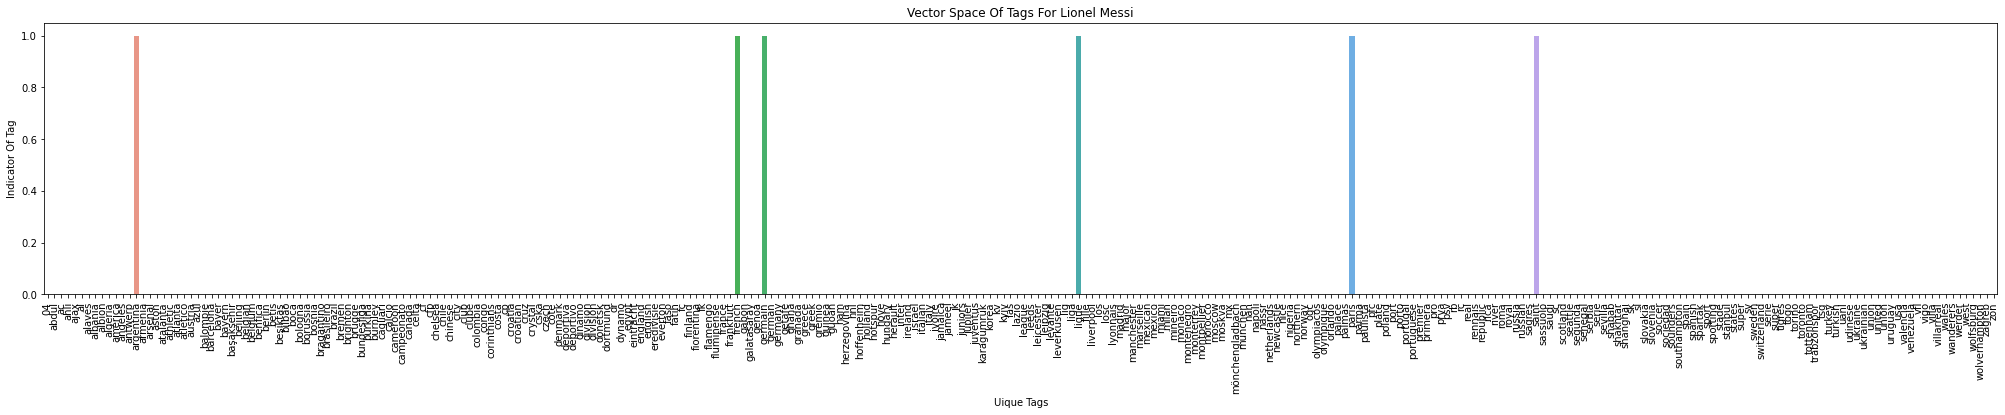

In [41]:
#These Plots wil visually help someone understand how similarity is calculated
#Messi's vectorized data
plt.figure(figsize=(35,5))
plt.title("Vector Space Of Tags For Lionel Messi")
sns.barplot(cv.get_feature_names(), vectors[0])
plt.xticks(rotation=90)
plt.xlabel("Uique Tags")
plt.ylabel("Indicator Of Tag")
plt.show()

/Users/sidgog/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


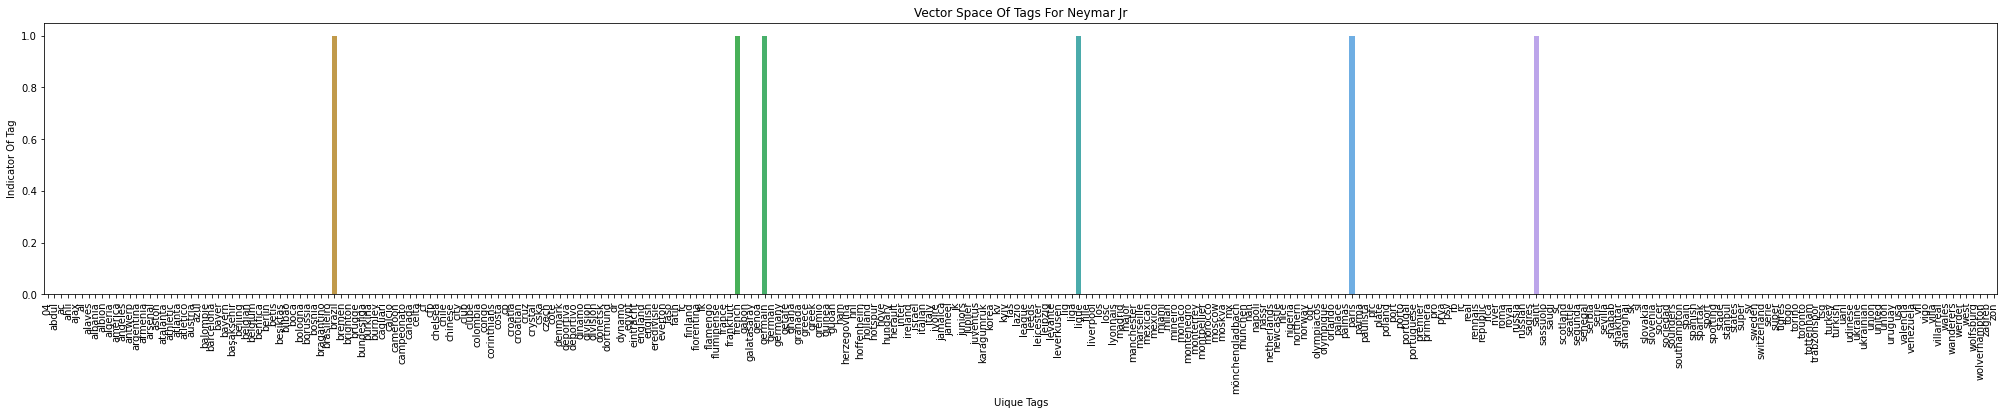

In [42]:
#Neymar's Vectorized Data
plt.figure(figsize=(35,5))
plt.title("Vector Space Of Tags For Neymar Jr")
sns.barplot(cv.get_feature_names(), vectors[3])
plt.xticks(rotation=90)
plt.xlabel("Uique Tags")
plt.ylabel("Indicator Of Tag")
plt.show()

In [43]:
#observing the most common words in all of the vectors
cv.get_feature_names()

['04',
 'abdul',
 'ac',
 'ahli',
 'ajax',
 'al',
 'alavés',
 'albania',
 'albion',
 'algeria',
 'américa',
 'angeles',
 'antwerp',
 'argentina',
 'armenia',
 'arsenal',
 'aston',
 'atalanta',
 'athletic',
 'atlanta',
 'atlético',
 'austria',
 'azul',
 'balompié',
 'barcelona',
 'bayer',
 'bayern',
 'başakşehir',
 'beijing',
 'belgian',
 'belgium',
 'benfica',
 'berlin',
 'betis',
 'beşiktaş',
 'bilbao',
 'boca',
 'bologna',
 'borussia',
 'bosnia',
 'bragantino',
 'brasileiro',
 'brazil',
 'bremen',
 'brighton',
 'brugge',
 'bundesliga',
 'burkina',
 'burnley',
 'cagliari',
 'calcio',
 'cameroon',
 'campeonato',
 'canada',
 'celta',
 'cf',
 'cfp',
 'chelsea',
 'chile',
 'chinese',
 'city',
 'club',
 'clube',
 'colombia',
 'congo',
 'corinthians',
 'costa',
 'cp',
 'croatia',
 'croatian',
 'cruz',
 'crystal',
 'cska',
 'czech',
 'côte',
 'denmark',
 'deportiva',
 'deportivo',
 'dinamo',
 'division',
 'división',
 'donetsk',
 'dortmund',
 'dr',
 'dynamo',
 'egypt',
 'eintracht',
 'england

In [44]:
#this will reduce the dimensionality of the vectors by removing similar words i.e love, loving, loved would be converted to one word - love
ps = PorterStemmer()
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [45]:
#applying the stemmer to the tags
df_final['tags'] = df_final['tags'].apply(stem)

In [46]:
vectors = cv.fit_transform(df_final['tags']).toarray()

In [47]:
#creating the similarity matrix
similarity = cosine_similarity(vectors)

In [48]:
#creating a dataframe out of the similarity matrix in order to plot heatmap
sim = {"Name" : np.array(df_final["short_name"])}
i = 0
while i <= len(df_final):
    for j in range(len(similarity)):
        sim[df_final["short_name"][i]] = similarity[j]
        i+=1
    if i == len(df_final):
        break

In [49]:
df_sim = pd.DataFrame(sim)
df_sim = df_sim.set_index("Name")
df_sim_10 = df_sim.iloc[:, 0:10].head(10)

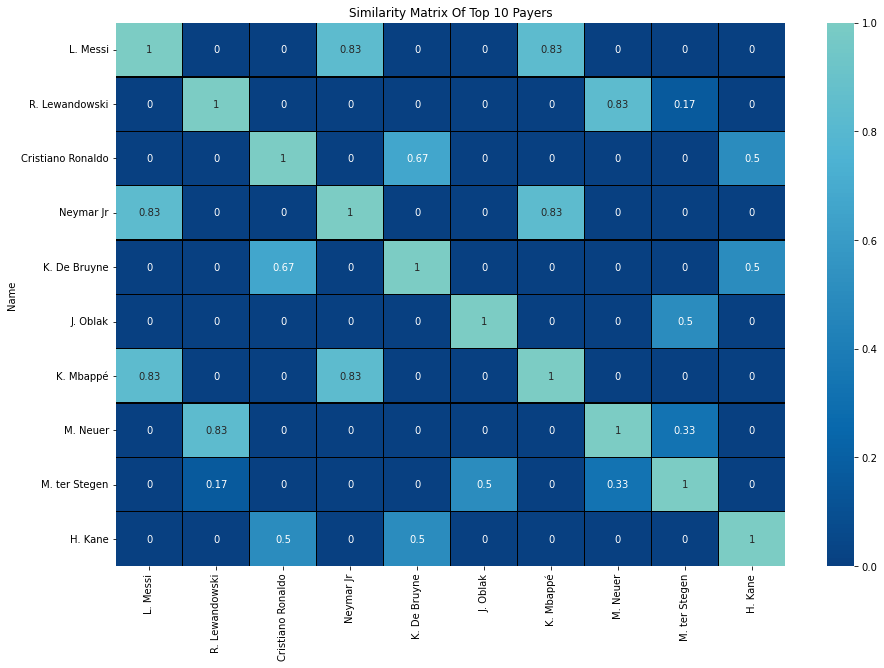

In [50]:
#heatmap for similarity matrix for top 10 players
plt.figure(figsize = (15,10))
plt.title("Similarity Matrix Of Top 10 Payers")
sns.heatmap(df_sim_10, annot=True, cmap='GnBu_r', center=1, linewidths=0.25, linecolor='black')
plt.show()

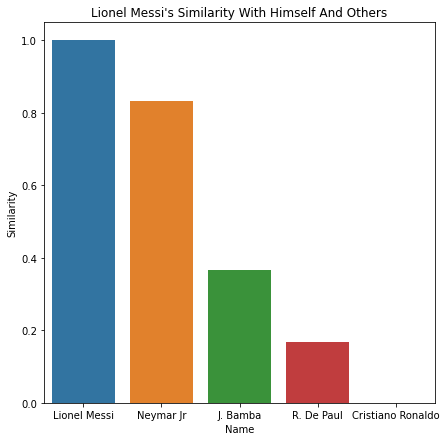

In [51]:
#Visually displaying how similarity is for a player w another player
#Example 1 Similarity of Leo with himself, Neymar, Bamba, De Paul, and Ronaldo
dic = {"Name": ["Lionel Messi", "Neymar Jr", "J. Bamba", "R. De Paul", "Cristiano Ronaldo"], 
       "Similarity": [similarity[0][0], similarity[0][3], similarity[0][457], similarity[0][246], similarity[0][2]]}
comp = pd.DataFrame(dic)
plt.figure(figsize=(7,7))
plt.title("Lionel Messi's Similarity With Himself And Others")
sns.barplot(data=comp, x="Name", y="Similarity")
plt.show()

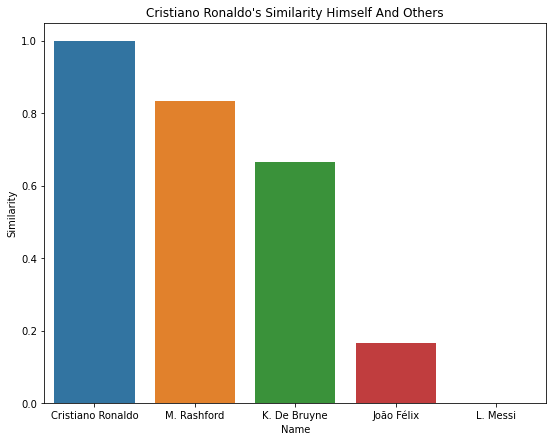

In [52]:
#Example 2 Similarity of Cris with himself, Rash, KDB, Felix, Leo
dic = {"Name": ["Cristiano Ronaldo", "M. Rashford", "K. De Bruyne", "João Félix", "L. Messi"], 
       "Similarity": [similarity[2][2], similarity[2][94], similarity[2][4], similarity[2][198], similarity[2][0]]}
comp = pd.DataFrame(dic) 
plt.figure(figsize=(9,7))
plt.title("Cristiano Ronaldo's Similarity Himself And Others")
sns.barplot(data=comp, x="Name", y="Similarity")
plt.show()

In [53]:
df_final['player_positions'] = df_final['player_positions'].apply(lambda x: [i.strip() for i in x])
df_final.head()

,player_face_url,overall,player_positions,short_name,Ratio,tags
0,https://cdn.sofifa.net/players/158/023/22_120.png,93,"[RW, ST, CF]",L. Messi,2.987597,french ligu 1 pari saint-germain argentina
1,https://cdn.sofifa.net/players/188/545/22_120.png,92,[ST],R. Lewandowski,5.000000,german 1 bundesliga fc bayern münchen poland
2,https://cdn.sofifa.net/players/020/801/22_120.png,91,"[ST, LW]",Cristiano Ronaldo,3.288201,english premier leagu manchest unit portug
3,https://cdn.sofifa.net/players/190/871/22_120.png,91,"[LW, CAM]",Neymar Jr,2.986111,french ligu 1 pari saint-germain brazil
4,https://cdn.sofifa.net/players/192/985/22_120.png,91,"[CM, CAM]",K. De Bruyne,8.833333,english premier leagu manchest citi belgium


In [54]:
#providing three unique formations for user to choose between
form = {'A': [["4-4-2"], ["LM", "ST", "ST", "RM"], ["CM", "CM"], ["LB", "CB", "CB", "RB"], ["GK"]],
       'B': [["4-3-3"], ["LW", "ST", "RW"], ["CM", "CM", "CM"], ["LB", "CB", "CB", "RB"], ["GK"]],
       'C': [["4-1-2-1-2"], ["ST", "ST"], ["CAM"], ["CM", "CDM", "CM"], ["LB", "CB", "CB", "RB"], ["GK"]]
      }


In [55]:
#building recommendation system
def recommend(player):
    used_players.append(player)
    player_idx = df_final[df_final['short_name'] == player].index[0]
    distances = similarity[player_idx]
    fullarr = []
    print("----------------------------------------------------------------------------------------------")
    if formation == 'A':
        arr = form['A']    
    elif formation == 'B':
        arr = form['B']
    else:
        arr = form['C']
    print(f"\nChosen Formation: {arr}\n")
    print(f"\nUsed Positions: {used_positions}")
    position = input("\nChoose Next Position: ")
    used_positions.append(position)
    for i in range(len(distances)):
        arr = []
        arr.append(distances[i])
        arr.append(df_final['overall'][i])
        arr.append(df_final['Ratio'][i])
        fullarr.append(arr)
        if len(used_players) == 11:
            break
    rec_by_user  = sorted(list(enumerate(fullarr)), reverse = True, key = lambda x:(x[1][0], x[1][2]))
    rec_by_player = sorted(list(enumerate(fullarr)), reverse = True, key = lambda x:(x[1][0], x[1][1]))
    count = 0
    i = 0
    if len(used_players) != 11:
        print('\n{0:30}  {1}'.format('Meta Recommendations:', 'Recommendations By Overall:\n'))
    while count != 5:
        if i == len(df_final):
            break
        if len(used_players) == 11:
            break
        if position in df_final['player_positions'][rec_by_user[i][0]] and df_final['short_name'][rec_by_user[i][0]] not in used_players and position in df_final['player_positions'][rec_by_player[i][0]] and df_final['short_name'][rec_by_player[i][0]] not in used_players:
            print('{0:30}  {1}'.format(df_final['short_name'][rec_by_user[i][0]], df_final['short_name'][rec_by_player[i][0]]))
            count +=1
            i+=1
        else:
            i+=1
            continue
    if len(used_players) != 11:
        player = input("Choose next player: ")
        recommend(player)
    elif len(used_players) == 11:
        print(f"\nYour Starting XI: {used_players}")
        print("----------------------------------------------------------------------------------------------")

In [56]:
#building the first player choosing mechanic to kick start the system
def hybrid_system(formation):
    recommended_players = []
    if formation == 'A':
        arr = form['A']    
    elif formation == 'B':
        arr = form['B']
    else:
        arr = form['C']
    first_position = input(f"\nChoose Position: {arr}\n")
    used_positions.append(first_position)
    count = 0
    while count!= 5:
        for i in range(len(df_final)):
            if first_position in df_final['player_positions'][i]:
                recommended_players.append(df_final['short_name'][i])
                count+=1
            else:
                continue
            if count == 5:
                break
            
    player = input(f"\nChoose player {recommended_players}:\n")
    recommend(player)

In [58]:
#running the system
used_players = []
used_positions = []
for key, value in form.items():
    print(f"{key}:\n")
    print(f"{value}\n")
formation = input("Choose Formation: ('A', 'B', 'C')\n")
print("----------------------------------------------------------------------------------------------")
hybrid_system(formation)

A:

[['4-4-2'], ['LM', 'ST', 'ST', 'RM'], ['CM', 'CM'], ['LB', 'CB', 'CB', 'RB'], ['GK']]

B:

[['4-3-3'], ['LW', 'ST', 'RW'], ['CM', 'CM', 'CM'], ['LB', 'CB', 'CB', 'RB'], ['GK']]

C:

[['4-1-2-1-2'], ['ST', 'ST'], ['CAM'], ['CM', 'CDM', 'CM'], ['LB', 'CB', 'CB', 'RB'], ['GK']]



Choose Formation: ('A', 'B', 'C')
 C


----------------------------------------------------------------------------------------------



Choose Position: [['4-1-2-1-2'], ['ST', 'ST'], ['CAM'], ['CM', 'CDM', 'CM'], ['LB', 'CB', 'CB', 'RB'], ['GK']]
 ST

Choose player ['L. Messi', 'R. Lewandowski', 'Cristiano Ronaldo', 'K. Mbappé', 'H. Kane']:
 Cristiano Ronaldo


----------------------------------------------------------------------------------------------

Chosen Formation: [['4-1-2-1-2'], ['ST', 'ST'], ['CAM'], ['CM', 'CDM', 'CM'], ['LB', 'CB', 'CB', 'RB'], ['GK']]


Used Positions: ['ST']



Choose Next Position:  CAM



Meta Recommendations:           Recommendations By Overall:

D. van de Beek                  Bernardo Silva
M. Mount                        K. Havertz
D. Alli                         G. Lo Celso
Q. Promes                       Q. Promes
Anderson Talisca                Anderson Talisca


Choose next player:  Bernardo Silva


----------------------------------------------------------------------------------------------

Chosen Formation: [['4-1-2-1-2'], ['ST', 'ST'], ['CAM'], ['CM', 'CDM', 'CM'], ['LB', 'CB', 'CB', 'RB'], ['GK']]


Used Positions: ['ST', 'CAM']



Choose Next Position:  CB



Meta Recommendations:           Recommendations By Overall:

J. Stones                       J. Stones
J. Evans                        J. Evans
M. Keane                        V. van Dijk
Azpilicueta                     Fabinho
A. Christensen                  Thiago Silva


Choose next player:  Sergio Ramos


----------------------------------------------------------------------------------------------

Chosen Formation: [['4-1-2-1-2'], ['ST', 'ST'], ['CAM'], ['CM', 'CDM', 'CM'], ['LB', 'CB', 'CB', 'RB'], ['GK']]


Used Positions: ['ST', 'CAM', 'CB']



Choose Next Position:  RB



Meta Recommendations:           Recommendations By Overall:

L. Klostermann                  Ricardo Pereira
R. Baku                         J. Cuadrado
J. Cuadrado                     H. Hateboer


Choose next player:  Carvajal


----------------------------------------------------------------------------------------------

Chosen Formation: [['4-1-2-1-2'], ['ST', 'ST'], ['CAM'], ['CM', 'CDM', 'CM'], ['LB', 'CB', 'CB', 'RB'], ['GK']]


Used Positions: ['ST', 'CAM', 'CB', 'RB']



Choose Next Position:  CM



Meta Recommendations:           Recommendations By Overall:

Merino                          Marcos Llorente
Koke                            David Silva
Marcos Llorente                 Merino
Pedri                           Sergio Busquets
Sergi Roberto                   Sergi Roberto


Choose next player:  Marcos Llorente


----------------------------------------------------------------------------------------------

Chosen Formation: [['4-1-2-1-2'], ['ST', 'ST'], ['CAM'], ['CM', 'CDM', 'CM'], ['LB', 'CB', 'CB', 'RB'], ['GK']]


Used Positions: ['ST', 'CAM', 'CB', 'RB', 'CM']



Choose Next Position:  LB



Meta Recommendations:           Recommendations By Overall:

Mario Hermoso                   Mario Hermoso
Jordi Alba                      Nacho Monreal
Grimaldo                        Grimaldo
Cucurella                       Cucurella


Choose next player:  Grimaldo


----------------------------------------------------------------------------------------------

Chosen Formation: [['4-1-2-1-2'], ['ST', 'ST'], ['CAM'], ['CM', 'CDM', 'CM'], ['LB', 'CB', 'CB', 'RB'], ['GK']]


Used Positions: ['ST', 'CAM', 'CB', 'RB', 'CM', 'LB']



Choose Next Position:  CB



Meta Recommendations:           Recommendations By Overall:

Mario Hermoso                   Piqué
Pau Torres                      Raúl Albiol
Bartra                          Nacho Fernández
Nacho Fernández                 Yeray
J. Koundé                       J. Koundé


Choose next player:  Éder Militão


----------------------------------------------------------------------------------------------

Chosen Formation: [['4-1-2-1-2'], ['ST', 'ST'], ['CAM'], ['CM', 'CDM', 'CM'], ['LB', 'CB', 'CB', 'RB'], ['GK']]


Used Positions: ['ST', 'CAM', 'CB', 'RB', 'CM', 'LB', 'CB']



Choose Next Position:  GK



Meta Recommendations:           Recommendations By Overall:

J. Oblak                        J. Oblak
Rui Silva                       Rui Silva
S. Sirigu                       É. Mendy
A. Marchesín                    S. Mandanda
N. Pope                         G. Ochoa


Choose next player:  J. Oblak


----------------------------------------------------------------------------------------------

Chosen Formation: [['4-1-2-1-2'], ['ST', 'ST'], ['CAM'], ['CM', 'CDM', 'CM'], ['LB', 'CB', 'CB', 'RB'], ['GK']]


Used Positions: ['ST', 'CAM', 'CB', 'RB', 'CM', 'LB', 'CB', 'GK']



Choose Next Position:  CDM



Meta Recommendations:           Recommendations By Overall:

Fernando                        F. Coquelin
K. Kampl                        K. Kampl
Y. Tielemans                    N. Kanté
B. Kamara                       Marquinhos
D. Zakaria                      Fabinho


Choose next player:  Casemiro


----------------------------------------------------------------------------------------------

Chosen Formation: [['4-1-2-1-2'], ['ST', 'ST'], ['CAM'], ['CM', 'CDM', 'CM'], ['LB', 'CB', 'CB', 'RB'], ['GK']]


Used Positions: ['ST', 'CAM', 'CB', 'RB', 'CM', 'LB', 'CB', 'GK', 'CDM']



Choose Next Position:  ST



Meta Recommendations:           Recommendations By Overall:

Á. Correa                       L. Suárez
A. Isak                         Á. Correa
N. Fekir                        N. Fekir
Iñaki Williams                  Iñaki Williams
Y. En-Nesyri                    S. Agüero


Choose next player:  Á. Correa


----------------------------------------------------------------------------------------------

Chosen Formation: [['4-1-2-1-2'], ['ST', 'ST'], ['CAM'], ['CM', 'CDM', 'CM'], ['LB', 'CB', 'CB', 'RB'], ['GK']]


Used Positions: ['ST', 'CAM', 'CB', 'RB', 'CM', 'LB', 'CB', 'GK', 'CDM', 'ST']



Choose Next Position:  CM



Meta Recommendations:           Recommendations By Overall:

R. De Paul                      R. De Paul
H. Herrera                      T. Lemar
Merino                          Sergio Busquets
Sergi Roberto                   Pedri
F. de Jong                      D. Wass


Choose next player:  F. de Jong


----------------------------------------------------------------------------------------------

Chosen Formation: [['4-1-2-1-2'], ['ST', 'ST'], ['CAM'], ['CM', 'CDM', 'CM'], ['LB', 'CB', 'CB', 'RB'], ['GK']]


Used Positions: ['ST', 'CAM', 'CB', 'RB', 'CM', 'LB', 'CB', 'GK', 'CDM', 'ST', 'CM']



Choose Next Position:  



Your Starting XI: ['Cristiano Ronaldo', 'Bernardo Silva', 'Sergio Ramos', 'Carvajal', 'Marcos Llorente', 'Grimaldo', 'Éder Militão', 'J. Oblak', 'Casemiro', 'Á. Correa', 'F. de Jong']
----------------------------------------------------------------------------------------------


In [ ]:
#testing threshold against used players
for player in used_players:
    if df_final['Ratio'][df_final[df_final['short_name'] == player].index[0]] > 5.0:
        print(player, "META")
    else:
        print(player, "NOT-META")